## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [1]:
!pip install praw

   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 191.0/191.0 kB 5.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1.2 라이브러리 설정

In [2]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sihyun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sihyun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [4]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [34]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')
type(top_posts)

praw.models.listing.generator.ListingGenerator

2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [35]:
posts = []

# 제목과 본문을 추출, posts에 저장
for post in top_posts:
    posts.append({
        "Title": post.title,
        "Text": post.selftext
    })
    
df = pd.DataFrame(posts)
df

,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
230,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ..."
231,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...
232,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...
233,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

### 토큰화

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sihyun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
word_tokens = []
for text in df['Text']:
    tokens = word_tokenize(text)
    word_tokens.extend(tokens)

In [55]:
len(word_tokens)

152566

In [56]:
for text in df['Title']:
    tokens = word_tokenize(text)
    word_tokens.extend(tokens)

In [57]:
len(word_tokens)

155626

### 불용어 제거

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sihyun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [64]:
import string

stop_words = set(stopwords.words('english')) 

#불용어와 문장부호 제거
def remove_stopwords(text):
    filtered =  [word for word in tokens 
        if word.lower() not in stop_words and not any(char in string.punctuation for char in word)]
    return filtered

cleaned = remove_stopwords(word_tokens)

In [65]:
print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',cleaned)

불용어 제거 전 : ['As', 'the', 'Fed', 'caused', 'a', 'bit', 'of', 'a', 'ripple', 'in', 'the', 'market', 'today', 'and', 'I', 'considered', 'vacating', 'a', 'position', '(', 'but', 'ultimately', 'did', "n't", ')', '.', 'I', 'thought', 'a', 'little', 'bit', 'about', 'my', 'journey', 'over', 'the', 'years', 'and', 'thought', 'I', "'d", 'share', 'a', 'story', 'and', 'a', 'few', 'things', 'I', "'ve", 'learned', '.', 'Back', 'in', '2003', ',', 'I', 'made', 'my', 'first', 'move', 'in', 'the', 'stock', 'market', 'by', 'taking', 'an', '$', '1800', 'tax', 'return', 'and', 'buying', '200', 'shares', 'of', 'a', 'coal', 'company', 'called', 'Consol', '.', 'At', 'the', 'time', 'it', 'traded', 'under', 'the', 'symbol', 'CNX', '.', 'I', 'bought', 'it', 'with', 'almost', 'no', 'DD', 'simply', 'because', 'it', 'paid', 'a', 'pretty', 'good', 'dividend', '.', '(', 'Around', '.50/share', 'if', 'I', 'recall', 'correctly', '.', ')', 'This', 'is', 'back', 'when', 'internet', 'trading', 'really', 'was', "n't", 'a', 

### 소문자로 바꾸기

In [66]:
low_tokens = [word.lower() for word in cleaned]
low_tokens

['fed',
 'caused',
 'bit',
 'ripple',
 'market',
 'today',
 'considered',
 'vacating',
 'position',
 'ultimately',
 'thought',
 'little',
 'bit',
 'journey',
 'years',
 'thought',
 'share',
 'story',
 'things',
 'learned',
 'back',
 '2003',
 'made',
 'first',
 'move',
 'stock',
 'market',
 'taking',
 '1800',
 'tax',
 'return',
 'buying',
 '200',
 'shares',
 'coal',
 'company',
 'called',
 'consol',
 'time',
 'traded',
 'symbol',
 'cnx',
 'bought',
 'almost',
 'simply',
 'paid',
 'pretty',
 'good',
 'dividend',
 'around',
 'recall',
 'correctly',
 'back',
 'internet',
 'trading',
 'really',
 'thing',
 'bought',
 'bank',
 'trade',
 'cost',
 'actually',
 'call',
 'broker',
 'bank',
 'place',
 'trade',
 'phone',
 'ancient',
 'times',
 'right',
 'lol',
 'figured',
 'win',
 'lose',
 'draw',
 'eventually',
 'stock',
 'pay',
 'dividend',
 'follow',
 'market',
 'much',
 'really',
 'holding',
 'dividend',
 'realized',
 'couple',
 'years',
 'later',
 'climbed',
 '30s',
 'around',
 '2007',
 'hit',

### 표제어 추출 (단어의 원형 추출)

In [70]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lmtzr = WordNetLemmatizer()
tokens = [lmtzr.lemmatize(word) for word in low_tokens]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sihyun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sihyun\AppData\Roaming\nltk_data...


### 동사 표제어 추출 [ex) caused -> cause]

In [72]:
tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]
tokens

['feed',
 'cause',
 'bite',
 'ripple',
 'market',
 'today',
 'consider',
 'vacate',
 'position',
 'ultimately',
 'think',
 'little',
 'bite',
 'journey',
 'year',
 'think',
 'share',
 'story',
 'thing',
 'learn',
 'back',
 '2003',
 'make',
 'first',
 'move',
 'stock',
 'market',
 'take',
 '1800',
 'tax',
 'return',
 'buy',
 '200',
 'share',
 'coal',
 'company',
 'call',
 'consol',
 'time',
 'trade',
 'symbol',
 'cnx',
 'buy',
 'almost',
 'simply',
 'pay',
 'pretty',
 'good',
 'dividend',
 'around',
 'recall',
 'correctly',
 'back',
 'internet',
 'trade',
 'really',
 'thing',
 'buy',
 'bank',
 'trade',
 'cost',
 'actually',
 'call',
 'broker',
 'bank',
 'place',
 'trade',
 'phone',
 'ancient',
 'time',
 'right',
 'lol',
 'figure',
 'win',
 'lose',
 'draw',
 'eventually',
 'stock',
 'pay',
 'dividend',
 'follow',
 'market',
 'much',
 'really',
 'hold',
 'dividend',
 'realize',
 'couple',
 'year',
 'later',
 'climb',
 '30',
 'around',
 '2007',
 'hit',
 'decide',
 'sell',
 'still',
 'bank'

2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

In [75]:
word_counts = Counter(tokens)

sorted_word_counts = word_counts.most_common()  # 빈도수가 높은순서대로 정렬

# 결과 출력
print("Word Counts:")
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

Word Counts:
company: 765
stock: 713
earn: 706
http: 623
market: 577
nvidia: 560
year: 523
say: 481
billion: 392
price: 391
share: 344
chip: 316
time: 301
revenue: 300
week: 268
since: 267
intel: 266
buy: 261
last: 257
make: 253
click: 250
expect: 245
go: 243
new: 233
one: 224
release: 224
like: 223
estimate: 222
report: 218
also: 218
move: 213
use: 202
high: 200
amd: 199
get: 198
nvda: 198
trade: 186
would: 186
investor: 183
growth: 180
chart: 178
day: 176
sale: 171
month: 169
think: 168
see: 166
come: 161
data: 160
index: 156
increase: 155
invest: 154
friday: 154
game: 153
quarter: 153
per: 152
could: 148
sell: 143
take: 142
higher: 142
well: 141
average: 140
fund: 139
people: 139
tesla: 139
business: 138
2020: 138
call: 137
big: 137
microsoft: 135
past: 135
500: 133
interest: 132
still: 130
apple: 130
look: 127
rate: 125
include: 125
amazon: 119
close: 119
technology: 117
may: 117
tech: 115
million: 115
number: 114
next: 113
lot: 111
etf: 111
consensus: 111
beat: 111
back: 110
first

In [82]:
common_word = word_counts.most_common(200)
word_freq = dict(common_word)

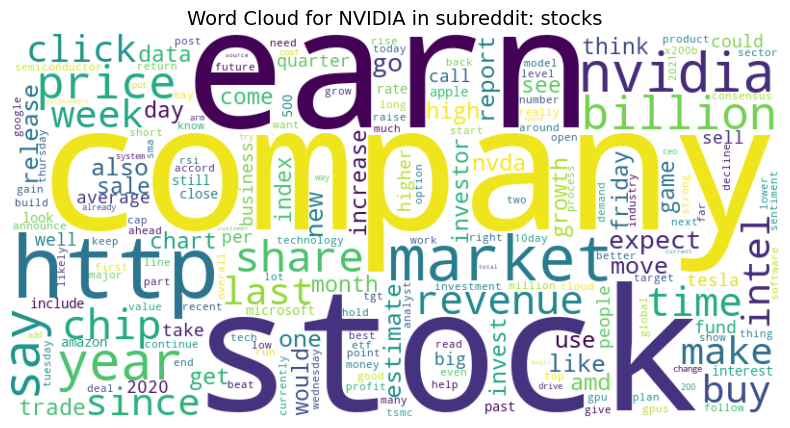

In [83]:
# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('Word Cloud for NVIDIA in subreddit: stocks', fontsize=14)
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

In [87]:
# 데이터프레임 생성
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# 내림차순 정렬
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)
word_counts_df

,Word,Frequency
31,company,765
23,stock,713
623,earn,706
335,http,623
4,market,577
...,...,...
4643,desperately,1
2095,magnetic,1
2094,metallic,1
4647,bridge,1


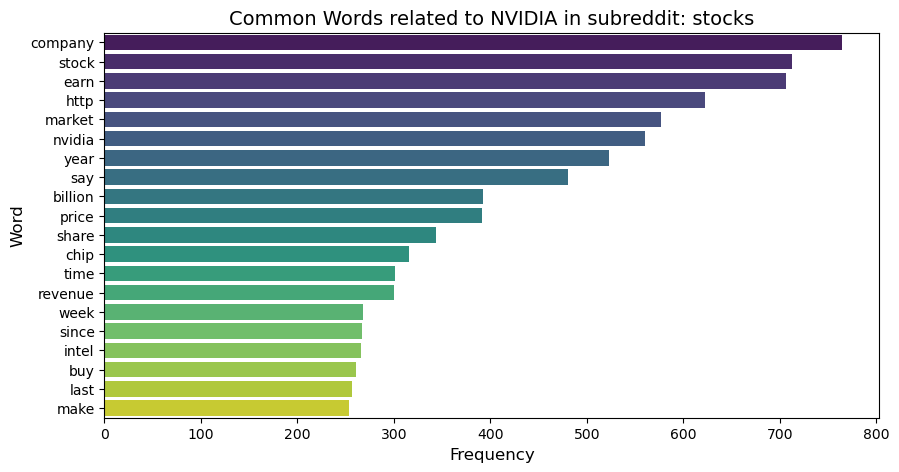

In [94]:
plt.figure(figsize=(10, 5))
sns.barplot(data=word_counts_df.head(20), x='Frequency', y='Word', palette='viridis')
plt.title('Common Words related to NVIDIA in subreddit: stocks', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

### 감정분석 진행

In [97]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# 감정 분석 함수
def get_sentiment(word):
    score = sia.polarity_scores(word)  # 각 단어의 감정 점수 계산
    return score['compound']  # compound 점수 반환 (가장 종합적인 점수)

# 감정 점수도 df에 추가
word_counts_df['Sentiment'] = word_counts_df['Word'].apply(get_sentiment)

print(word_counts_df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sihyun\AppData\Roaming\nltk_data...


             Word  Frequency  Sentiment
31        company        765     0.0000
23          stock        713     0.0000
623          earn        706     0.0000
335          http        623     0.0000
4          market        577     0.0000
...           ...        ...        ...
4643  desperately          1    -0.3818
2095     magnetic          1     0.0000
2094     metallic          1     0.0000
4647       bridge          1     0.0000
6806     cheapest          1     0.0000

[6807 rows x 3 columns]


In [99]:
# Sentiment가 0인 항목 삭제
filtered_df = word_counts_df[word_counts_df['Sentiment'] != 0]
filtered_df

,Word,Frequency,Sentiment
14,share,344,0.2960
169,like,223,0.3612
742,growth,180,0.3818
745,increase,155,0.3182
263,well,141,0.2732
...,...,...,...
4673,sore,1,-0.3612
4635,relieve,1,0.3612
4634,messy,1,-0.3612
2099,exploit,1,-0.1027


#### 긍정, 부정 상위 10개 단어 확인

In [102]:
word_sentiment = filtered_df.sort_values(by='Sentiment', ascending=False)
word_sentiment.head(10) #긍정적

,Word,Frequency,Sentiment
4443,euphoria,4,0.6486
4012,greatest,4,0.6369
196,love,10,0.6369
766,best,74,0.6369
1105,great,35,0.6249
6742,awesome,1,0.6249
2927,outstanding,4,0.6124
2583,super,15,0.5994
6602,brilliance,1,0.5994
3570,beautiful,1,0.5994


In [103]:
word_sentiment.tail(10) #부정적

,Word,Frequency,Sentiment
2322,disaster,2,-0.6249
173,worst,22,-0.6249
846,kia,1,-0.6369
5849,abuse,1,-0.6369
5112,dead,2,-0.6486
3947,catastrophe,1,-0.6597
1046,evil,1,-0.6597
5746,horrific,1,-0.6597
1746,hell,7,-0.6808
3663,kill,1,-0.6908


In [104]:
# 긍정, 부정 단어 분류
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    else:
        return 'Negative'

filtered_df['Sentiment_Category'] = filtered_df['Sentiment'].apply(categorize_sentiment)

# 긍정 및 부정 단어 빈도수 계산
sentiment_counts = filtered_df['Sentiment_Category'].value_counts()
sentiment_counts

C:\Users\sihyun\AppData\Local\Temp\ipykernel_1952\2983991605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment_Category'] = filtered_df['Sentiment'].apply(categorize_sentiment)


Positive    388
Negative    345
Name: Sentiment_Category, dtype: int64

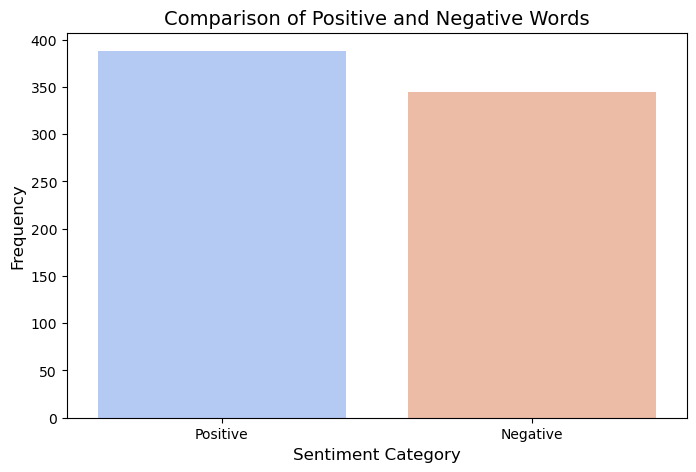

In [105]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Comparison of Positive and Negative Words', fontsize=14)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### 단어 감정 분석 결과로만 봤을 때 긍정적인 평가가 약간 더 우세한 것으로 확인..